In [1]:
import pandas as pd
#from pandas.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
import numpy as np
import os
import matplotlib as plt

print(os.getcwd())
print(os.listdir())

C:\Users\sudramak\SuperDS projects\Global Warming
['.ipynb_checkpoints', 'Global Warming.ipynb', 'Temp.xlsx', 'Warming.csv']


In [2]:
df = pd.read_excel('Temp.xlsx')

In [3]:
print(df.head())
print(df.tail())

        Month  Value
0  1880-01-01  -0.01
1  1880-02-01  -0.13
2  1880-03-01  -0.14
3  1880-04-01  -0.06
4  1880-05-01  -0.08
                    Month  Value
1645  2017-02-01 00:00:00   0.97
1646  2017-03-01 00:00:00   1.03
1647  2017-04-01 00:00:00   0.90
1648  2017-05-01 00:00:00   0.83
1649  2017-06-01 00:00:00   0.82


In [48]:
df.describe()

,Value
count,1650.000000
mean,0.052218
std,0.332780
min,-0.680000
25%,-0.190000
50%,-0.020000
75%,0.260000
max,1.250000


In [4]:
df.index = df['Month'].map(lambda p: pd.to_datetime(p,format='%Y-%m-%d %H:%M:%S'))

In [6]:
df.resample('M').sum()

,Value
Month,
1880-01-31,-0.01
1880-02-29,-0.13
1880-03-31,-0.14
1880-04-30,-0.06
1880-05-31,-0.08
1880-06-30,-0.18
1880-07-31,-0.16
1880-08-31,-0.09
1880-09-30,-0.10


In [7]:
%matplotlib inline
df_plot = pd.read_csv('Warming.csv',parse_dates=['Month'],index_col='Month')
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1650 entries, 1880-01-01 to 2017-06-01
Data columns (total 1 columns):
Value    1650 non-null float64
dtypes: float64(1)
memory usage: 25.8 KB


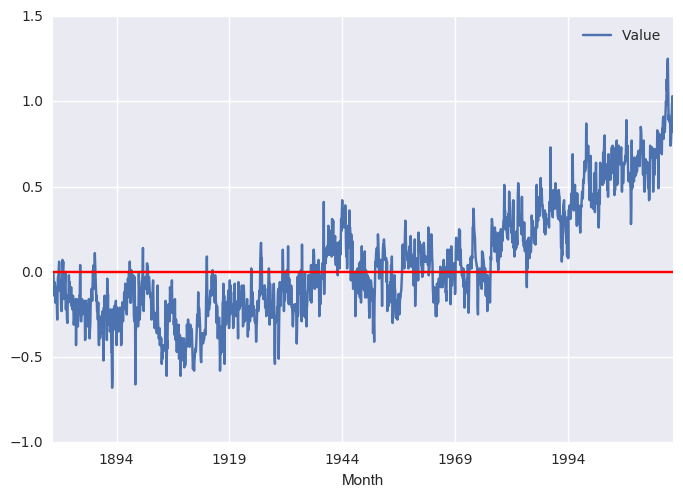

In [52]:
#df_plot.resample('A').mean().plot()
df_plot.plot()
plt1.axhline(y=0,color='r')

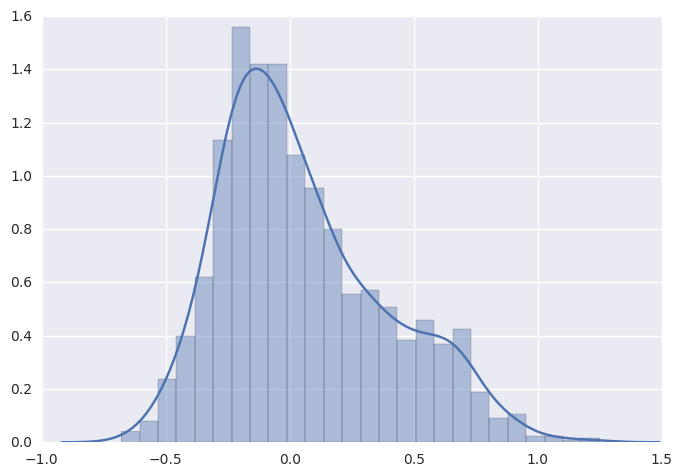

In [9]:
import seaborn as sns
sns.distplot(df_plot,norm_hist=False)

In [10]:
neg_mean = df_plot.resample('A').mean()

In [11]:
neg_mean.sort(ascending=True)

C:\Users\sudramak\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,Value
Month,
1880-12-31,-0.125833
1881-12-31,-0.075000
1882-12-31,-0.077500
1883-12-31,-0.152500
1884-12-31,-0.213333
1885-12-31,-0.222500
1886-12-31,-0.205833
1887-12-31,-0.255000
1888-12-31,-0.152500


In [12]:
#y = neg_mean[neg_mean['Value'] > 0].index[1].year
y = neg_mean[neg_mean['Value'] < 0]
year = y.index[y.shape[0]-1].year

In [13]:
year.real

1976

C:\Users\sudramak\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


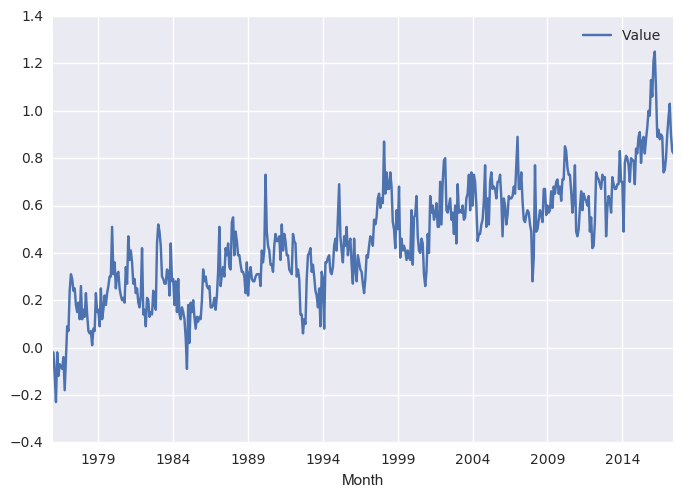

In [14]:
df_plot['1976':].resample('M').plot()

In [59]:
df_plot['1977':].resample('M').shape[0]

C:\Users\sudramak\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


486

In [51]:
ts = df_plot['1977':]

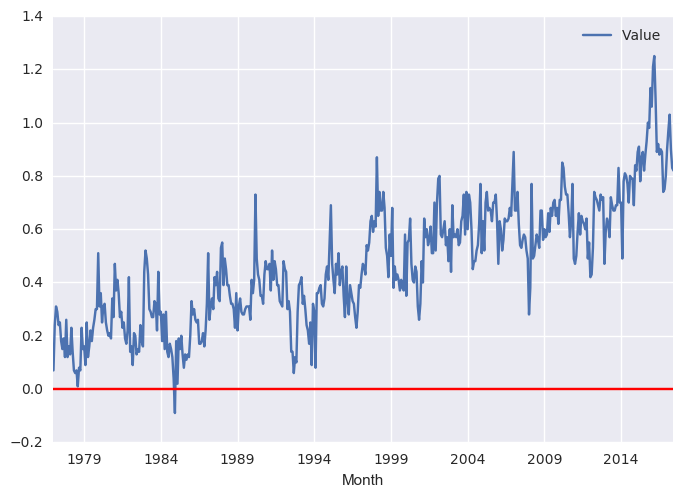

In [54]:
ts.plot()
plt1.axhline(y=0,color='r')

In [55]:
r_mean = ts.rolling(window=12).mean()
r_std = ts.rolling(window=12).std()

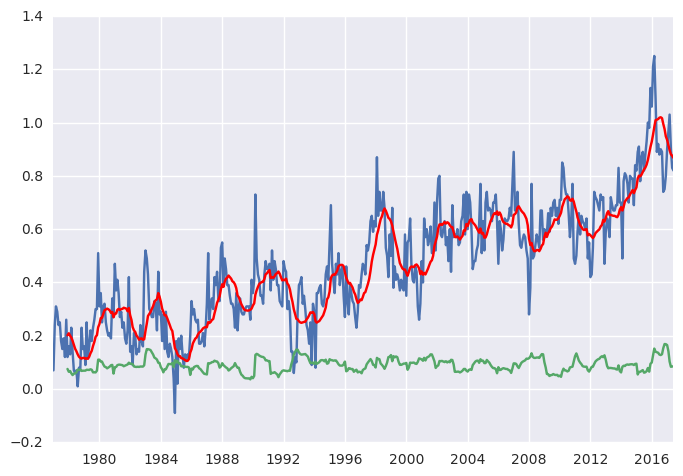

In [64]:
plt1.plot(ts)
plt1.plot(r_mean,color='r')
plt1.plot(r_std)

In [15]:
adf_result = stattools.adfuller(df_plot['Value'],autolag='AIC')

In [67]:
adf_result_ts = stattools.adfuller(ts['Value'])
adf_result_ts

(-1.6413429965511142,
 0.46155912445068908,
 9,
 476,
 {'1%': -3.4441628472391179,
  '10%': -2.5700143303792107,
  '5%': -2.8676311169658177},
 -897.23502069295364)

In [68]:
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

decompose_ts = seasonal.seasonal_decompose(ts)

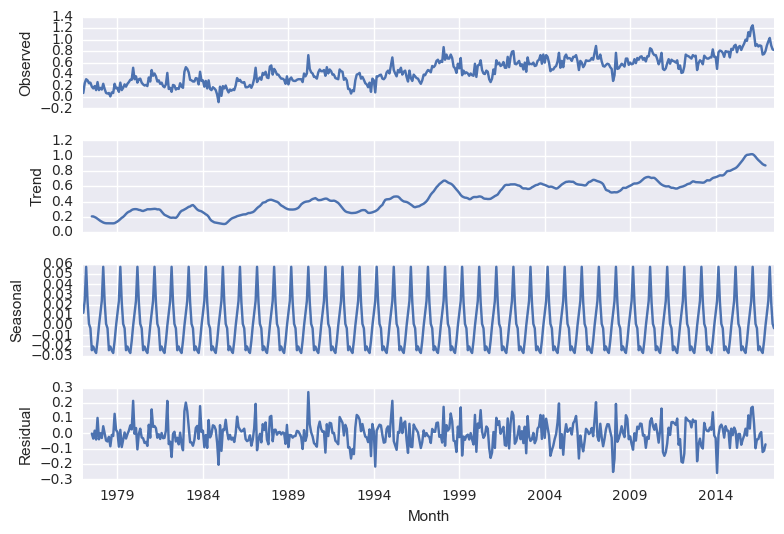

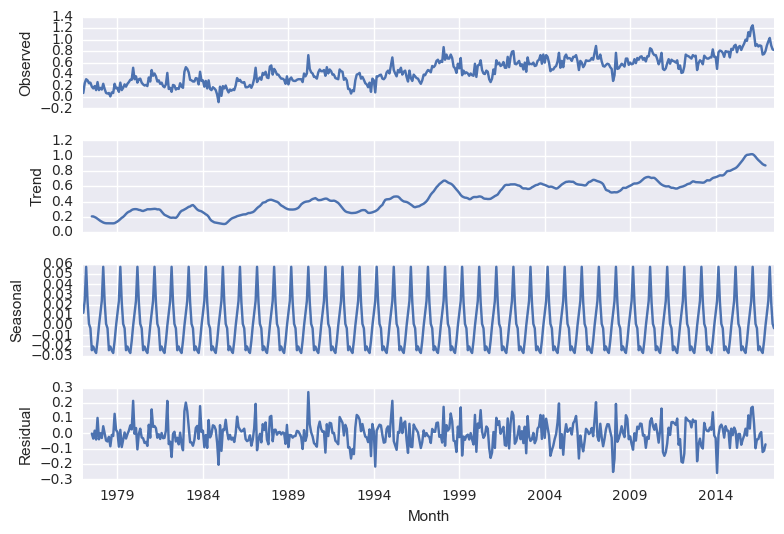

In [69]:
decompose_ts.plot()

In [18]:
df_plot['Value'].autocorr(10)

0.87807515588947516

In [67]:
first_order_diff = df_plot['Value'].diff(1)

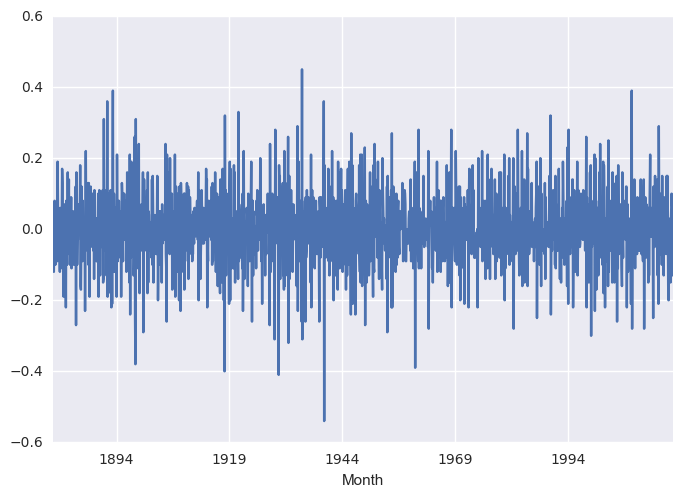

In [68]:
first_order_diff.plot()

In [70]:
first_order_diff.head()

Month
1880-01-01     NaN
1880-02-01   -0.12
1880-03-01   -0.01
1880-04-01    0.08
1880-05-01   -0.02
Name: Value, dtype: float64

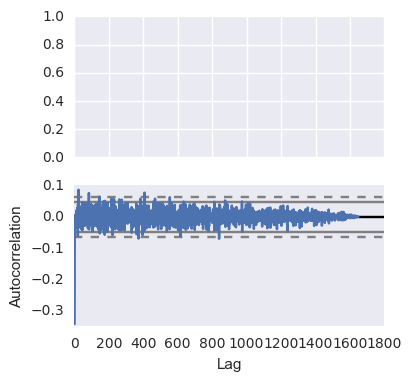

In [87]:
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(df_plot['Value'])
#autocorrelation_plot(df_plot['Value'])
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(4, 4)
autocorrelation_plot(first_order_diff.iloc[1:],ax = ax[1])

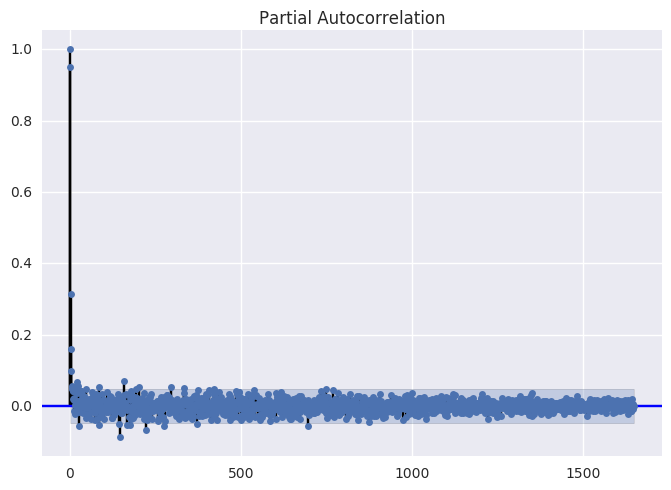

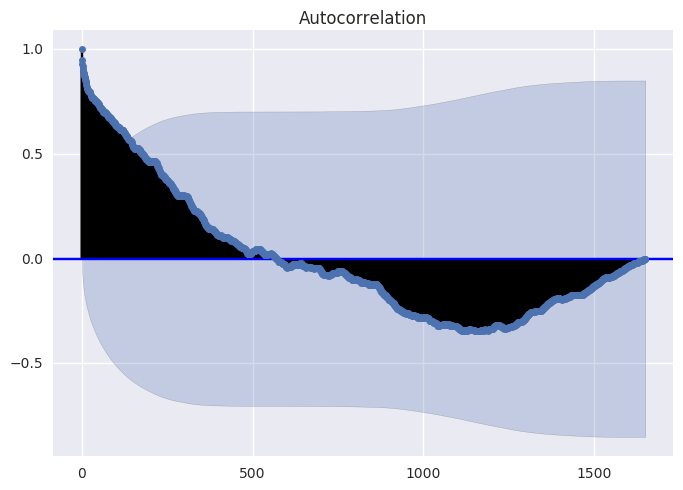

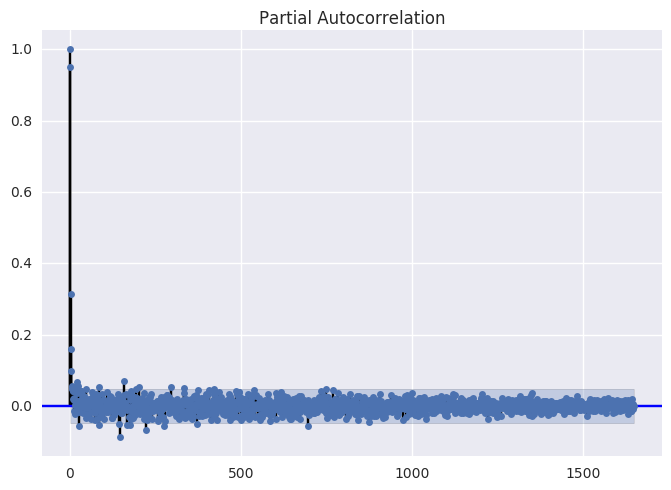

In [21]:
#Plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_plot['Value'])
plot_pacf(df_plot)

In [23]:
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

decompose_model = seasonal.seasonal_decompose(df_plot['Value'],model='additive')

In [36]:
decompose_model.seasonal.head()

Month
1880-01-01   -0.009672
1880-02-01   -0.009044
1880-03-01    0.008070
1880-04-01    0.004614
1880-05-01    0.001661
Name: Value, dtype: float64

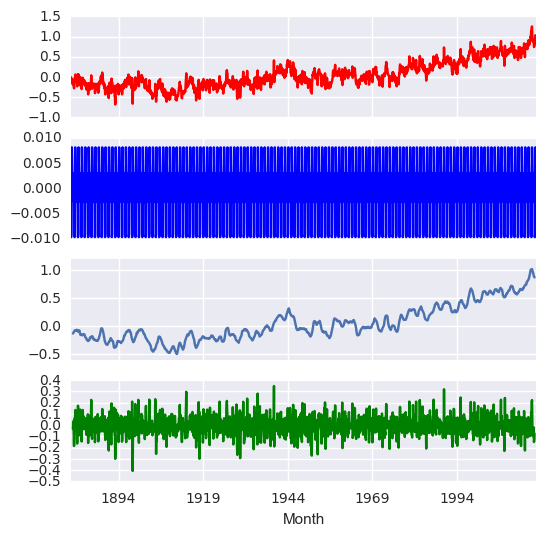

In [45]:
from matplotlib import pyplot as plt1
fig,arr = plt1.subplots(4,sharex=True)
fig.set_size_inches(6,6)
df_plot['Value'].plot(ax = arr[0],color = 'r',linestyle='-')
pd.Series(data = decompose_model.seasonal,index=df_plot.index).plot(ax=arr[1],color = 'b')
decompose_model.trend.plot(ax=arr[2])
decompose_model.resid.plot(ax=arr[3],color='g')

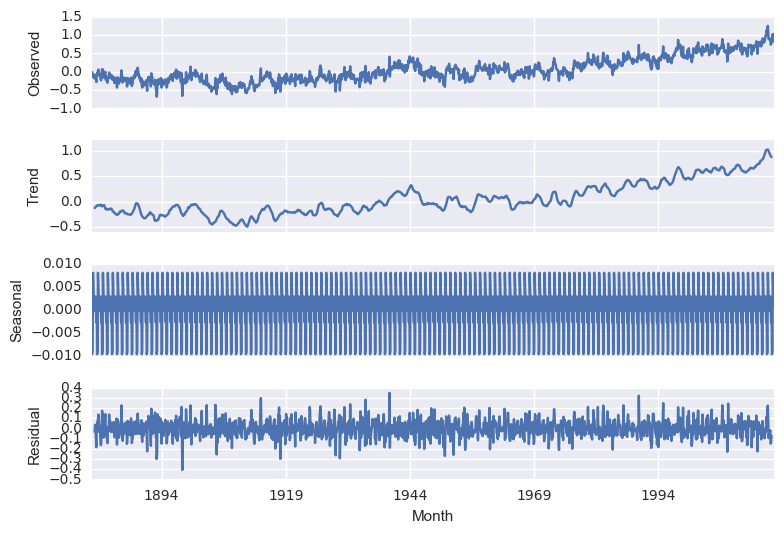

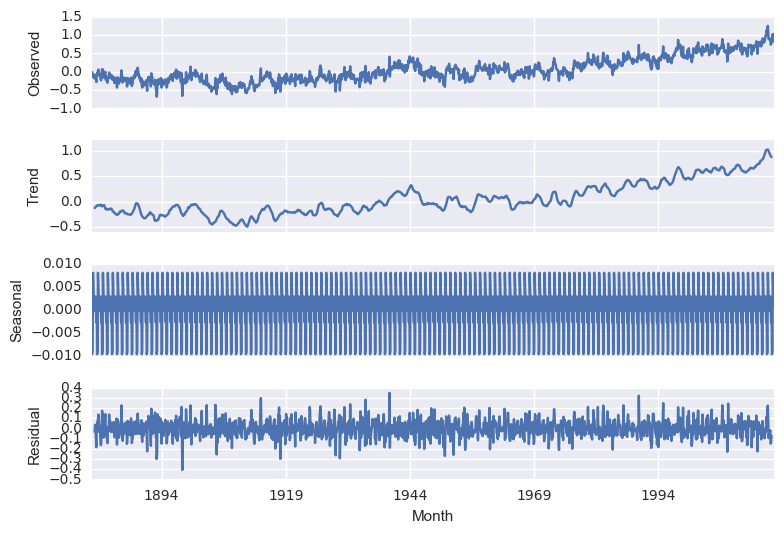

In [47]:
decompose_model.plot()